Problem Statement -
The problem is to analyze commodity prices for various commodities using the commodity
prices dataset. The goal is to leverage Python, data science techniques, statistical analysis
and data modeling. Perform all necessary steps to get the key insights from the data.


Dataset Description -
This dataset contains monthly commodity prices from 1960 to 2022. The commodity prices
dataset includes the following attributes:
Attributes Description
date The date of the recorded commodity price
oil_brent The price of Brent oil ($/bbl)
Oil_Dubai The price of Dubai oil ($/bbl)
Coffee_Arabica The price of Arabica coffee ($/kg)
Coffee_Robustas The price of Robusta coffee ($/kg)
Tea_Columbo The price of Columbo tea ($/kg)
Tea_Kolkata The price of Kolkata tea ($/kg)
Tea_Mombasa The price of Mombasa tea ($/kg)
Sugar_EU The price of EU sugar ($/kg)
Sugar_US The price of US sugar ($/kg)
Sugar_World The price of global sugar ($/kg)

In [ ]:
#importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Opening CSV file
df=pd.read_csv('/content/commodity_prices.csv')
df #Loading dataset

,Unnamed: 0,date,oil_brent,oil_dubai,coffee_arabica,coffee_robustas,tea_columbo,tea_kolkata,tea_mombasa,sugar_eu,sugar_us,sugar_world
0,1,1960-01-01,1.63,1.63,0.940900,0.696864,0.930301,1.121401,1.037400,0.122356,0.116845,0.066600
1,2,1960-02-01,1.63,1.63,0.946900,0.688707,0.930301,1.121401,1.037400,0.122356,0.119049,0.067900
2,3,1960-03-01,1.63,1.63,0.928100,0.688707,0.930301,1.121401,1.037400,0.122356,0.121254,0.068300
3,4,1960-04-01,1.63,1.63,0.930300,0.684519,0.930301,1.121401,1.037400,0.122356,0.123459,0.068100
4,5,1960-05-01,1.63,1.63,0.920000,0.690692,0.930301,1.121401,1.037400,0.122356,0.121254,0.068300
...,...,...,...,...,...,...,...,...,...,...,...,...
751,752,2022-08-01,98.60,97.75,5.917861,2.417366,4.210000,3.538154,2.360000,0.330773,0.782199,0.393525
752,753,2022-09-01,90.16,90.63,5.897138,2.455065,4.490000,3.153198,2.360000,0.323621,0.770956,0.390659
753,754,2022-10-01,93.13,90.59,5.292852,2.270979,4.135621,2.833112,2.457500,0.320943,0.762578,0.386911
754,755,2022-11-01,91.07,86.28,4.715462,2.041258,3.831528,2.849979,2.490000,0.332993,0.792340,0.407414


In [5]:
df.describe() #Data Description showing Count, Mean, Standard Deviation, Minimum, Maximum, etc. for the numeric features

,Unnamed: 0,oil_brent,oil_dubai,coffee_arabica,coffee_robustas,tea_columbo,tea_kolkata,tea_mombasa,sugar_eu,sugar_us,sugar_world
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,378.500000,32.724944,31.238130,2.576555,1.727478,1.777962,1.870308,1.671222,0.405158,0.432462,0.240263
std,218.382692,31.885368,30.936611,1.342454,0.940748,1.008679,0.697867,0.615357,0.187741,0.188589,0.151947
min,1.000000,1.210000,1.210000,0.777600,0.487210,0.434198,0.664799,0.719600,0.112215,0.116845,0.028700
25%,189.750000,10.564999,10.452500,1.351625,0.923053,0.892501,1.297369,1.136800,0.298120,0.297624,0.139705
50%,378.500000,20.489130,18.550000,2.697794,1.632172,1.504001,1.850612,1.598257,0.402343,0.471119,0.215285
75%,567.250000,47.157500,45.576023,3.312950,2.282200,2.515204,2.376899,2.083830,0.569519,0.512188,0.309325
max,756.000000,133.873043,131.224783,7.003600,6.883547,4.490000,4.073011,3.392500,0.783171,1.263247,1.237700


In [6]:
df.describe(include='O') #Data Description showing Count, Mean, Standard Deviation, Minimum, Maximum, etc. for the Object datatype

,date
count,756
unique,756
top,1960-01-01
freq,1


In [7]:
df.shape #Dimensions of the Dataset i.e., There are 756 rows and 12 columns

(756, 12)

In [8]:
df.columns #All the columns present in the table

Index(['Unnamed: 0', 'date', 'oil_brent', 'oil_dubai', 'coffee_arabica',
       'coffee_robustas', 'tea_columbo', 'tea_kolkata', 'tea_mombasa',
       'sugar_eu', 'sugar_us', 'sugar_world'],
      dtype='object')

In [9]:
df.info() #Dataset Types and Non-Null Count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       756 non-null    int64  
 1   date             756 non-null    object 
 2   oil_brent        756 non-null    float64
 3   oil_dubai        756 non-null    float64
 4   coffee_arabica   756 non-null    float64
 5   coffee_robustas  756 non-null    float64
 6   tea_columbo      756 non-null    float64
 7   tea_kolkata      756 non-null    float64
 8   tea_mombasa      756 non-null    float64
 9   sugar_eu         756 non-null    float64
 10  sugar_us         756 non-null    float64
 11  sugar_world      756 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 71.0+ KB


In [10]:
df.isna().sum() #As we can see there are no null values present in the entire table

,0
Unnamed: 0,0
date,0
oil_brent,0
oil_dubai,0
coffee_arabica,0
coffee_robustas,0
tea_columbo,0
tea_kolkata,0
tea_mombasa,0
sugar_eu,0


In [11]:
df['date'] = pd.to_datetime(df['date']) #Converting Object datatype to datetime datatype
datatypes=df.dtypes #Dataset types
print(df['date'])
print('\n')
print(datatypes)

0     1960-01-01
1     1960-02-01
2     1960-03-01
3     1960-04-01
4     1960-05-01
         ...    
751   2022-08-01
752   2022-09-01
753   2022-10-01
754   2022-11-01
755   2022-12-01
Name: date, Length: 756, dtype: datetime64[ns]


Unnamed: 0                  int64
date               datetime64[ns]
oil_brent                 float64
oil_dubai                 float64
coffee_arabica            float64
coffee_robustas           float64
tea_columbo               float64
tea_kolkata               float64
tea_mombasa               float64
sugar_eu                  float64
sugar_us                  float64
sugar_world               float64
dtype: object


In [13]:
df.corr() #Correlation of the dataset

,Unnamed: 0,date,oil_brent,oil_dubai,coffee_arabica,coffee_robustas,tea_columbo,tea_kolkata,tea_mombasa,sugar_eu,sugar_us,sugar_world
Unnamed: 0,1.000000,1.000000,0.790716,0.787449,0.589985,0.199374,0.878675,0.682750,0.783018,0.623722,0.782564,0.485101
date,1.000000,1.000000,0.790714,0.787447,0.589984,0.199372,0.878679,0.682742,0.783023,0.623721,0.782563,0.485104
oil_brent,0.790716,0.790714,1.000000,0.999050,0.635122,0.289532,0.825682,0.649773,0.757440,0.392355,0.667861,0.577870
oil_dubai,0.787449,0.787447,0.999050,1.000000,0.637200,0.292352,0.829778,0.648664,0.760027,0.372103,0.664593,0.579741
coffee_arabica,0.589985,0.589984,0.635122,0.637200,1.000000,0.796575,0.622773,0.690913,0.708380,0.359124,0.643302,0.502542
coffee_robustas,0.199374,0.199372,0.289532,0.292352,0.796575,1.000000,0.252750,0.480477,0.457382,0.230805,0.326737,0.291863
tea_columbo,0.878675,0.878679,0.825682,0.829778,0.622773,0.252750,1.000000,0.720038,0.853978,0.360962,0.698256,0.493622
tea_kolkata,0.682750,0.682742,0.649773,0.648664,0.690913,0.480477,0.720038,1.000000,0.754013,0.457369,0.706304,0.460688
tea_mombasa,0.783018,0.783023,0.757440,0.760027,0.708380,0.457382,0.853978,0.754013,1.000000,0.410663,0.706676,0.506499
sugar_eu,0.623722,0.623721,0.392355,0.372103,0.359124,0.230805,0.360962,0.457369,0.410663,1.000000,0.590955,0.304783


In [14]:
df.drop(columns=['Unnamed: 0']) #Removing 'Unnamed: 0' column as it is unwanted

,date,oil_brent,oil_dubai,coffee_arabica,coffee_robustas,tea_columbo,tea_kolkata,tea_mombasa,sugar_eu,sugar_us,sugar_world
0,1960-01-01,1.63,1.63,0.940900,0.696864,0.930301,1.121401,1.037400,0.122356,0.116845,0.066600
1,1960-02-01,1.63,1.63,0.946900,0.688707,0.930301,1.121401,1.037400,0.122356,0.119049,0.067900
2,1960-03-01,1.63,1.63,0.928100,0.688707,0.930301,1.121401,1.037400,0.122356,0.121254,0.068300
3,1960-04-01,1.63,1.63,0.930300,0.684519,0.930301,1.121401,1.037400,0.122356,0.123459,0.068100
4,1960-05-01,1.63,1.63,0.920000,0.690692,0.930301,1.121401,1.037400,0.122356,0.121254,0.068300
...,...,...,...,...,...,...,...,...,...,...,...
751,2022-08-01,98.60,97.75,5.917861,2.417366,4.210000,3.538154,2.360000,0.330773,0.782199,0.393525
752,2022-09-01,90.16,90.63,5.897138,2.455065,4.490000,3.153198,2.360000,0.323621,0.770956,0.390659
753,2022-10-01,93.13,90.59,5.292852,2.270979,4.135621,2.833112,2.457500,0.320943,0.762578,0.386911
754,2022-11-01,91.07,86.28,4.715462,2.041258,3.831528,2.849979,2.490000,0.332993,0.792340,0.407414


1. What is the maximum price of Robusta coffee ?

In [15]:
df['coffee_robustas'].max() #To check the maximum price of Robustas

6.883547

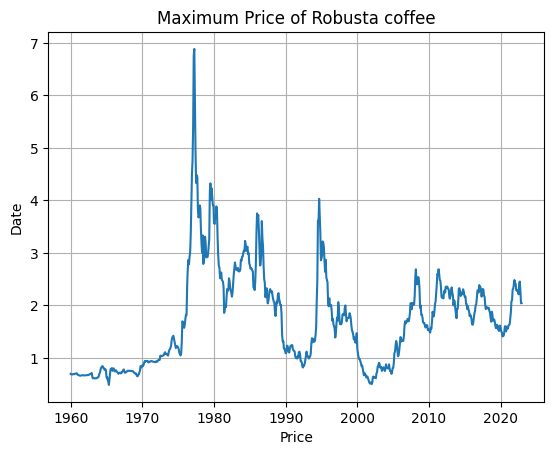

In [16]:
plt.plot(df['date'],df['coffee_robustas'])
plt.title('Maximum Price of Robusta coffee')
plt.xlabel('Price')
plt.ylabel('Date')
plt.grid(True)
plt.show()

2. What is the 75th percentile of sugar prices in the European Union (EU)?

In [17]:
df['sugar_eu'].quantile(0.75)

0.56951937998

{'whiskers': [<matplotlib.lines.Line2D at 0x7a839a935ff0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a8399725090>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a839a7b5150>],
 'medians': [<matplotlib.lines.Line2D at 0x7a8399727e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a8399724e80>],
 'means': [<matplotlib.lines.Line2D at 0x7a8399725900>]}

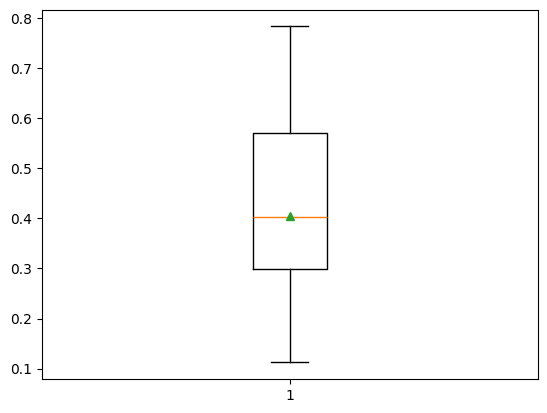

In [18]:
plt.boxplot(df['sugar_eu'],showmeans=True)

3. What is the skewness of the price distribution for Arabica coffee?

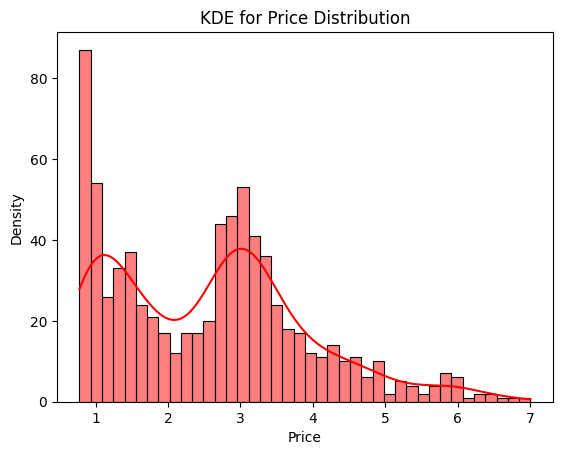

In [19]:
sns.histplot(df['coffee_arabica'],kde=True,bins=40,color='red')
plt.title('KDE for Price Distribution')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()
#It is positively skewed (right-skewed)

4. Is the distribution of sugar prices in the US signicantly different from a normal distribution?

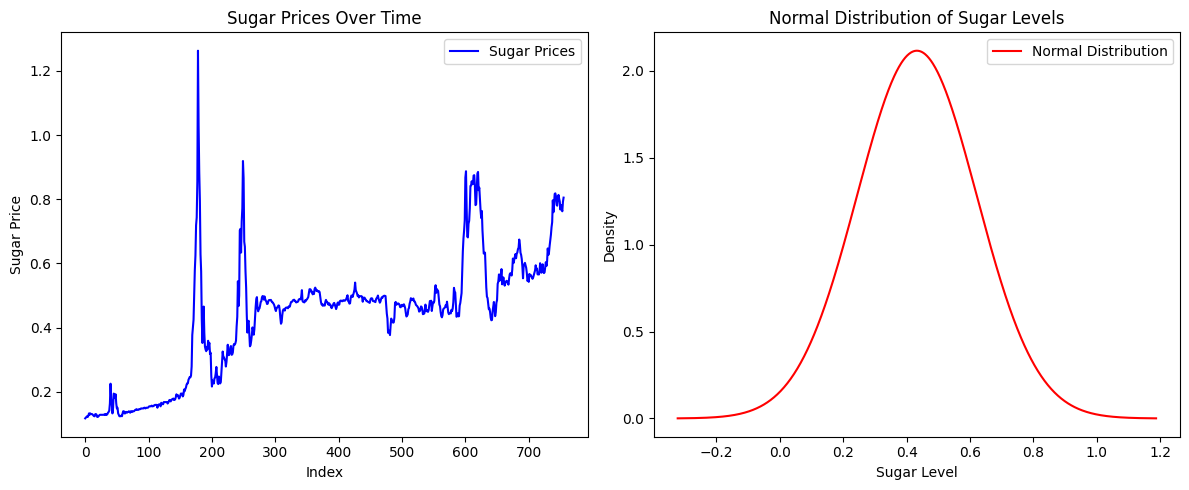

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics as st

# Assuming df['sugar_us'] contains the sugar prices
m = np.mean(df['sugar_us'])  # Calculate mean
sd = st.stdev(df['sugar_us'])  # Calculate standard deviation

# Create x values for the normal distribution
x = np.linspace(m - 4*sd, m + 4*sd, 1000)
f = norm.pdf(x, m, sd)  # Evaluate the normal PDF

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot sugar price data on the first subplot
axes[0].plot(df['sugar_us'], label='Sugar Prices', color='blue')
axes[0].set_title('Sugar Prices Over Time')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Sugar Price')
axes[0].legend()

# Plot normal distribution on the second subplot
axes[1].plot(x, f, label='Normal Distribution', color='red')
axes[1].set_title('Normal Distribution of Sugar Levels')
axes[1].set_xlabel('Sugar Level')
axes[1].set_ylabel('Density')
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()
#YES they are different

5. How many times does the price of Dubai oil exceed the price of Brent oil by a certain
threshold $10 ?


0      0.00
1      0.00
2      0.00
3      0.00
4      0.00
       ... 
751   -0.85
752    0.47
753   -2.54
754   -4.79
755   -4.12
Name: diff, Length: 756, dtype: float64
Count: 0


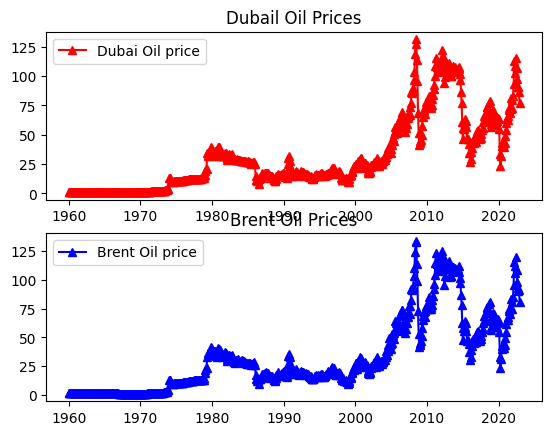

<Figure size 2000x1000 with 0 Axes>

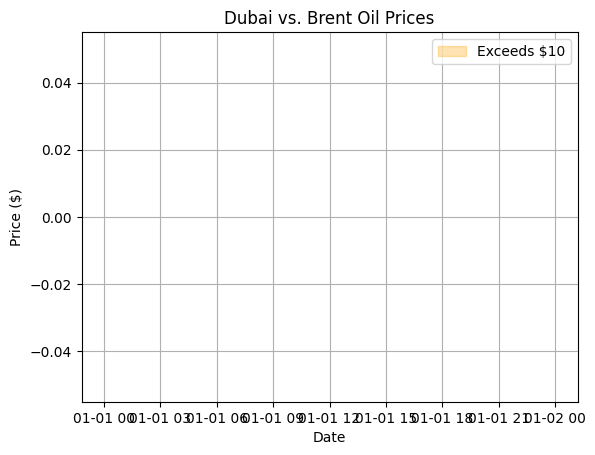

In [ ]:
df['date']=pd.to_datetime(df['date'])
d_oil=df['oil_dubai']
b_oil=df['oil_brent']
df['diff']=d_oil-b_oil
exceed=df[df['diff']>10]
print(df['diff'])
print('Count:',len(exceed)) #Number of exceeding values
fig,axis=plt.subplots(2,1)
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.5)
axis[0].set_title('Dubail Oil Prices')
axis[0].plot(df['date'],d_oil,label='Dubai Oil price',marker='^',color='r')
axis[0].legend()
axis[1].set_title('Brent Oil Prices')
axis[1].plot(df['date'],b_oil,label='Brent Oil price',marker='^',color='b')
axis[1].legend()
plt.tight_layout()
fig,axis=plt.subplots(1,1)
plt.fill_between(df['date'], d_oil, b_oil, where=df['diff'] > 10,
                 color='orange', alpha=0.3, label='Exceeds $10')
plt.title('Dubai vs. Brent Oil Prices') #As there are no exceeding values the plot will look empty
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid()
plt.show()

6. What is the overall price trend for each commodity ?

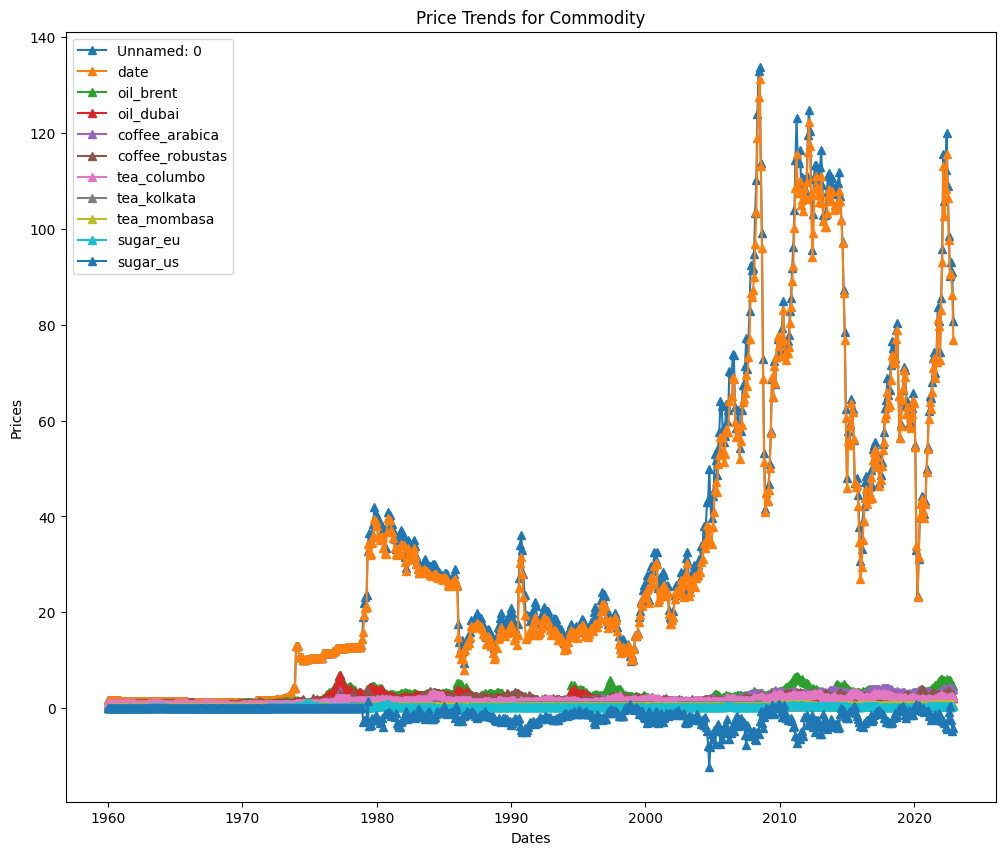

In [ ]:
df['date']=pd.to_datetime(df['date'])
df_melted=df.melt(id_vars=['date'],value_vars=['oil_brent', 'oil_dubai', 'coffee_arabica',
       'coffee_robustas', 'tea_columbo', 'tea_kolkata', 'tea_mombasa',
       'sugar_eu', 'sugar_us', 'sugar_world', 'diff'],var_name='Commodity',value_name='Price')
plt.figure(figsize=(12,10))
for commodity in df_melted['Commodity'].unique():
  cd=df_melted[df_melted['Commodity']==commodity]
  plt.plot(cd['date'],cd['Price'],marker='^')
plt.ylabel('Prices')
plt.xlabel('Dates')
plt.title('Price Trends for Commodity')
plt.legend(df,loc='best')
plt.show()

7. Which commodity experienced the highest price fluctuations during the observed period?

The commodity experienced maximum price fluctuation is oil_brent with a standard deviation of 31.885368325000805


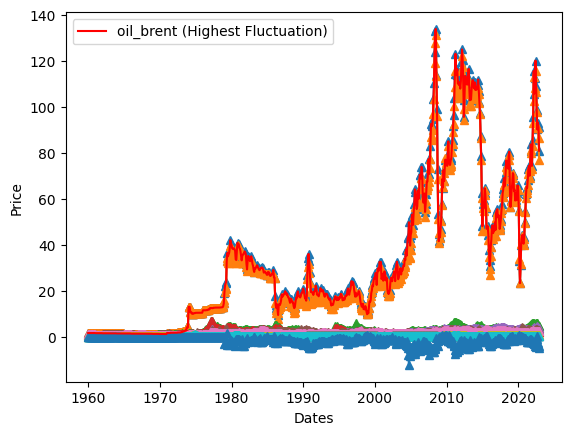

In [ ]:
price_flutuations=df_melted.groupby('Commodity')['Price'].std()
max_fluct_comm=price_flutuations.idxmax()
max_fluct_val=price_flutuations.max()
print(f"The commodity experienced maximum price fluctuation is {max_fluct_comm} with a standard deviation of {max_fluct_val}")

for commodity in df_melted['Commodity'].unique():
  cd=df_melted[df_melted['Commodity']==commodity]
  plt.plot(cd['date'],cd['Price'],marker='^')

plt.plot(df_melted[df_melted['Commodity']==max_fluct_comm]['date'],df_melted[df_melted['Commodity']==max_fluct_comm]['Price'],
         label=f"{max_fluct_comm} (Highest Fluctuation)",color='r')
plt.legend()
plt.ylabel('Price')
plt.xlabel('Dates')
plt.show()

8. How has brent oil prices vary on a quarterly basis since the last five years?

<ipython-input-32-42ae3f36c19f>:20: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_data = b_oil_data['oil_brent'].resample('Q').mean()


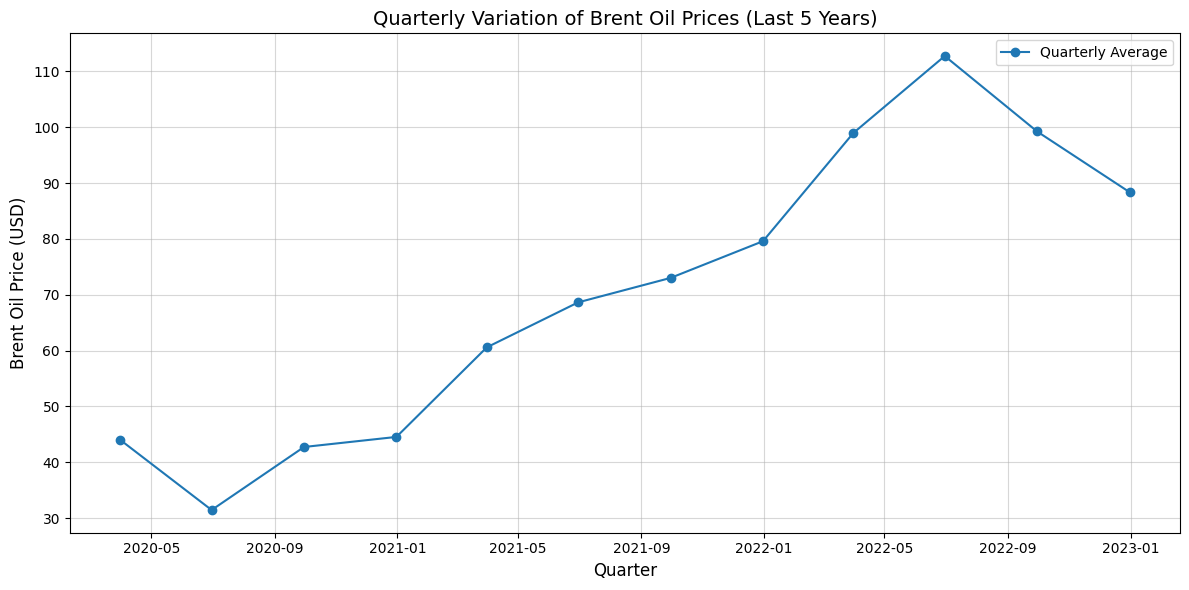

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract Brent Oil data
b_oil_data = df[['date', 'oil_brent']]
b_oil_data.set_index('date', inplace=True)

# Get today's date and calculate the date five years ago
today = datetime.today()
five_years_ago = today - timedelta(days=5 * 365 + (1 if today.year % 4 == 0 else 0))

# Filter data for the last 5 years
b_oil_data = b_oil_data[b_oil_data.index >= five_years_ago]

# Resample data quarterly and calculate mean prices
quarterly_data = b_oil_data['oil_brent'].resample('Q').mean()

# Plot the quarterly Brent oil prices
plt.figure(figsize=(12, 6))
plt.plot(quarterly_data.index, quarterly_data.values, marker='o', label='Quarterly Average')
plt.title('Quarterly Variation of Brent Oil Prices (Last 5 Years)', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Brent Oil Price (USD)', fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

9. Is there a correlation between global sugar prices and the prices of EU sugar and US sugar?

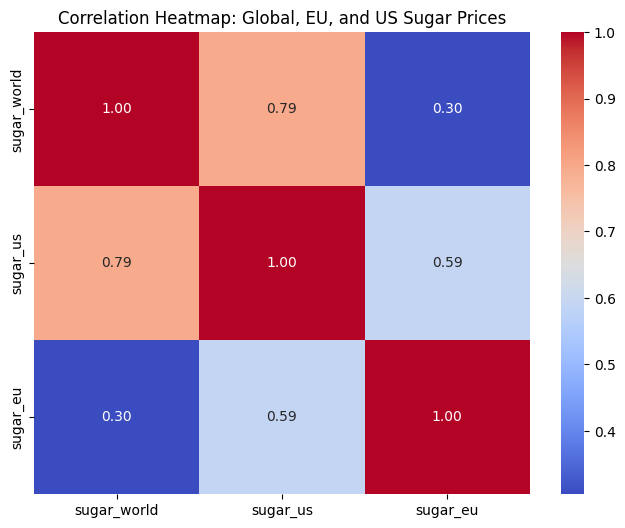

In [48]:
correlation=df[['sugar_world','sugar_us','sugar_eu']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Heatmap: Global, EU, and US Sugar Prices")
plt.show()


#A strong positive correlation is observed between global sugar prices and US sugar prices.
#A moderate positive correlation exists between EU and US sugar prices.
#A weak positive correlation is observed between global and EU sugar prices.

10. Is there a signicant difference in the distribution of sugar prices between Europe (EU) and
the United States (US)?


<ipython-input-50-a08e21b0bd6b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['sugar_eu'], label='EU Sugar Prices', shade=True, color='blue')
<ipython-input-50-a08e21b0bd6b>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['sugar_us'], label='US Sugar Prices', shade=True, color='orange')


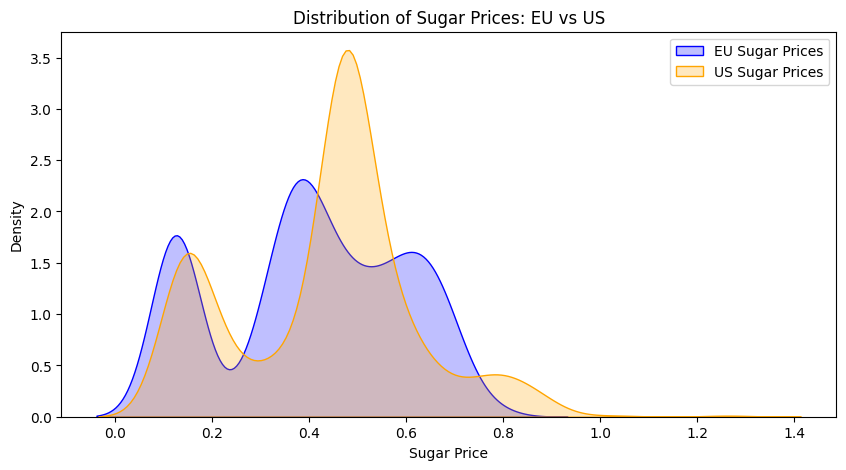

Two-Sample t-test: t-statistic = -2.821, p-value = 0.005
Mann-Whitney U Test: U-statistic = 255449.500, p-value = 0.000
The t-test indicates a significant difference between EU and US sugar prices.
The Mann-Whitney U test indicates a significant difference between EU and US sugar prices.


In [50]:
from scipy.stats import ttest_ind, mannwhitneyu

plt.figure(figsize=(10, 5))
sns.kdeplot(df['sugar_eu'], label='EU Sugar Prices', shade=True, color='blue')
sns.kdeplot(df['sugar_us'], label='US Sugar Prices', shade=True, color='orange')
plt.title('Distribution of Sugar Prices: EU vs US')
plt.xlabel('Sugar Price')
plt.ylabel('Density')
plt.legend()
plt.show()

# Perform statistical tests
t_stat, t_p = ttest_ind(df['sugar_eu'],df['sugar_us'], equal_var=False)  # Welch's t-test
u_stat, u_p = mannwhitneyu(df['sugar_eu'],df['sugar_us'], alternative='two-sided')

# Print test results
print(f"Two-Sample t-test: t-statistic = {t_stat:.3f}, p-value = {t_p:.3f}")
print(f"Mann-Whitney U Test: U-statistic = {u_stat:.3f}, p-value = {u_p:.3f}")

# Interpretation
if t_p < 0.05:
    print("The t-test indicates a significant difference between EU and US sugar prices.")
else:
    print("The t-test indicates no significant difference between EU and US sugar prices.")

if u_p < 0.05:
    print("The Mann-Whitney U test indicates a significant difference between EU and US sugar prices.")
else:
    print("The Mann-Whitney U test indicates no significant difference between EU and US sugar prices.")